# 5.2

In [256]:
import math
import matplotlib.pyplot as plt

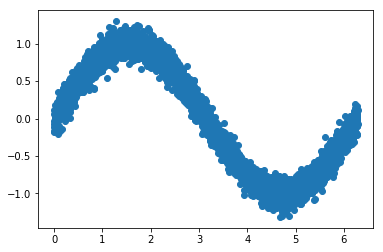

In [257]:
def f(x):
    return np.sin(x)
pi=math.pi
xmin,xmax,npts=[0,2*pi,5000]
X=np.linspace(xmin,xmax,npts)
Y=f(X)+np.random.normal(0,scale=0.1,size=np.shape(X))
plt.scatter(X,Y,marker='o')

In [258]:
X_fold=[]
for i in range(0,10):
    X_fold.append(X[i::10])


In [259]:
X_fold=np.asarray(X_fold)

In [260]:
X_fold[1].shape# the second set

(500,)

In [261]:
train_len=(9/10)*len(X_fold[1])

In [262]:
train_len

450.0

In [263]:
train_set=[]
test_set=[]
from sklearn.model_selection import train_test_split


# for i in range(0,10):
#     Set=X_fold[i]
for i in range(0,10):
    X_train, X_test= train_test_split(X_fold[i], train_size=0.9, random_state=42)
    train_set.append(X_train)
    test_set.extend(X_test)



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [264]:
train_set=np.asarray(train_set)
test_set=np.asarray(test_set)

In [265]:
train_set[1].shape

(450,)

In [266]:
# test_set=[]
# for i in range(0,10):
#     Set=X_fold[i]
#     test_set.extend(Set[450:])

In [267]:
test_set.shape

(500,)

In [268]:
def aim_function(x):
    return np.sin(x)
def g(X,p):
    return np.power(X,p)
def Amat(X_train,p):
    Xmat=[]
    for i in range(1,p+1):
        Xmat.append(g(X_train,i))
    Xmat=np.asarray(Xmat)
    Xmat=Xmat.reshape(p,450)
    Xmat=Xmat.T
    col1=np.ones(np.shape(Xmat)[0]).reshape(np.shape(X_train)[0],1)
    Xmat=np.concatenate((col1,Xmat),axis=1)
    return Xmat

In [269]:
lamda=0.2
W=[]
for j in range(0,10):
    Xmat=Amat(train_set[j],3)
    n,p=Xmat.shape
    I=np.ones(p**2).reshape(p,p)
    W.append((np.linalg.inv(Xmat.T.dot(Xmat)+lamda*I)).dot(Xmat.T).dot(aim_function(train_set[1])))
#     l1=y_real-pred(k,W,xinput)
#     l=l1.T.dot(l1)+ll*(W.T.dot(W))
#     loss.append(l)

In [270]:
W=np.asarray(W)

In [271]:
W.shape

(10, 4)

In [272]:
W[1]

array([-0.21942019,  1.93442398, -0.89051548,  0.09452316])

In [273]:
W.T.shape

(4, 10)

In [274]:
W1=np.mean(W.T[0])
W2=np.mean(W.T[1])
W3=np.mean(W.T[2])
W4=np.mean(W.T[3])
# W5=np.mean(W.T[4])
# W6=np.mean(W.T[5])



W_opt=np.asarray([W1,W2,W3,W4])

In [275]:
W_opt.shape

(4,)

In [276]:
def pred(j,w,x):
    predict=w[0]
    for p in range(1,j+1):
        predict+=w[p]*(x**p)
    return predict

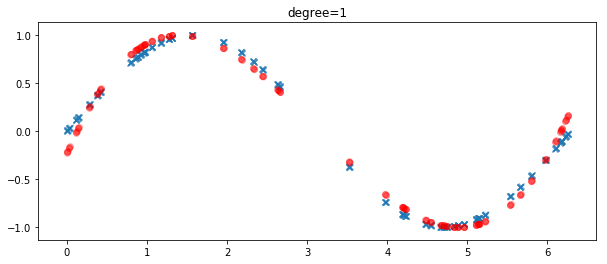

In [277]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,4))
ax.scatter(test_set,f(test_set),marker='x',alpha=0.3)
# ax.set_ylim(ymin=-10,ymax=3)
# ax.set_xlim(xmin=5.5,xmax=6.5)

ax.set_title('degree=1')
ax.scatter(test_set,pred(3,W_opt,test_set),color='red',alpha=0.1)

In [278]:
l1=f(test_set)-pred(3,W_opt,test_set)
loss_min=l1.T.dot(l1)+lamda*(W_opt.T.dot(W_opt))
print('number of points in test set is 500,\nvalue of loss function is ',loss_min)
loss_all=[]
s=[]
for i in range(0,10):
    s.append(i)
    l1=f(test_set)-pred(3,W[i],test_set)
    loss=l1.T.dot(l1)+lamda*(W[i].T.dot(W[i]))
    loss_all.append(loss)
#     loss=((f(test_set)-pred(3,W[i],test_set)).dot(np.ones(len(test_set)).reshape(len(test_set),1)))/len(test_set)
    loss_com= loss-loss_min
    print('the Loss using model learned from sub-training set',i+1, 'is\n ',loss,
         '\nthe difference of this model from the optimal model is\n',loss_com)
print('the minimum Loss is',min(loss_all),
     '\n the training set is',s[loss_all.index(min(loss_all))]+1)

number of points in test set is 500,
value of loss function is  4.517015125825364
the Loss using model learned from sub-training set 1 is
  4.53243072955292 
the difference of this model from the optimal model is
 0.015415603727555904
the Loss using model learned from sub-training set 2 is
  4.5263169666423995 
the difference of this model from the optimal model is
 0.009301840817035334
the Loss using model learned from sub-training set 3 is
  4.521717119581146 
the difference of this model from the optimal model is
 0.004701993755781508
the Loss using model learned from sub-training set 4 is
  4.518631416544831 
the difference of this model from the optimal model is
 0.0016162907194665621
the Loss using model learned from sub-training set 5 is
  4.517060099138007 
the difference of this model from the optimal model is
 4.497331264285975e-05
the Loss using model learned from sub-training set 6 is
  4.517003422222851 
the difference of this model from the optimal model is
 -1.1703602512

In [279]:
lamda=np.linspace(0,100)
lam=[]
loss=[]
for l in lamda:
    lam.append(l)
    W=[]
    for j in range(0,10):
        Xmat=Amat(train_set[j],4)
        n,p=Xmat.shape
        I=np.ones(p**2).reshape(p,p)
        W.append((np.linalg.inv(Xmat.T.dot(Xmat)+l*I)).dot(Xmat.T).dot(aim_function(train_set[1])))
    W=np.asarray(W)
    W1=np.mean(W.T[0])
    W2=np.mean(W.T[1])
    W3=np.mean(W.T[2])
    W4=np.mean(W.T[3])
    W5=np.mean(W.T[4])

#     W6=np.mean(W.T[5])


    W_opt=np.asarray([W1,W2,W3,W4,W5])
    l1=f(test_set)-pred(4,W_opt,test_set)
    loss1=l1.T.dot(l1)+l*(W_opt.T.dot(W_opt))
    loss.append(loss1)
#     l1=y_real-pred(k,W,xinput)

Text(0,0.5,'loss')

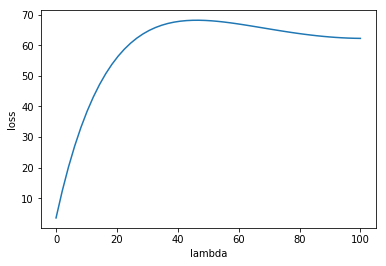

In [280]:
plt.plot(lam,loss)
plt.xlabel('lambda')
plt.ylabel('loss')

In [281]:
min(loss)

3.5988131502625

In [282]:
lam[loss.index(min(loss))]

0.0